In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from time import time

In [4]:
df=pd.read_csv("../Dataset/Dataset.txt",delimiter=";")
df.head(5)
df.dtypes

/tmp/ipykernel_6488/3959094110.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../Dataset/Dataset.txt",delimiter=";")


Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
cols_to_process=df.select_dtypes(include='object').columns.difference(["Date","Time"])
df[cols_to_process]=df[cols_to_process].apply(
    lambda col: pd.to_numeric(col,errors='coerce')
)

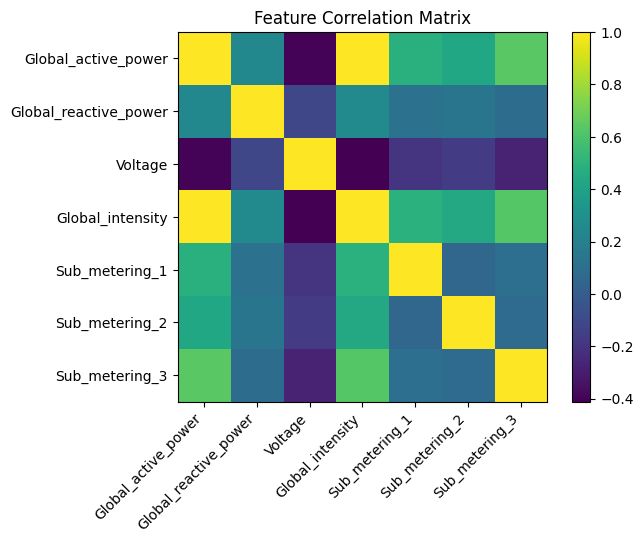

In [6]:
num_matrix=df.select_dtypes(include="number").corr()
fig ,ax=plt.subplots()

im=ax.imshow(num_matrix)

ax.set_xticks(range(len(num_matrix.columns)))
ax.set_yticks(range(len(num_matrix.columns)))

ax.set_xticklabels(num_matrix.columns, rotation=45 , ha="right")
ax.set_yticklabels(num_matrix.columns)

fig.colorbar(im)

ax.set_title("Feature Correlation Matrix")

plt.show()

2026-02-01 21:08:11.568151: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-01 21:08:11.933777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-01 21:08:13.492182: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


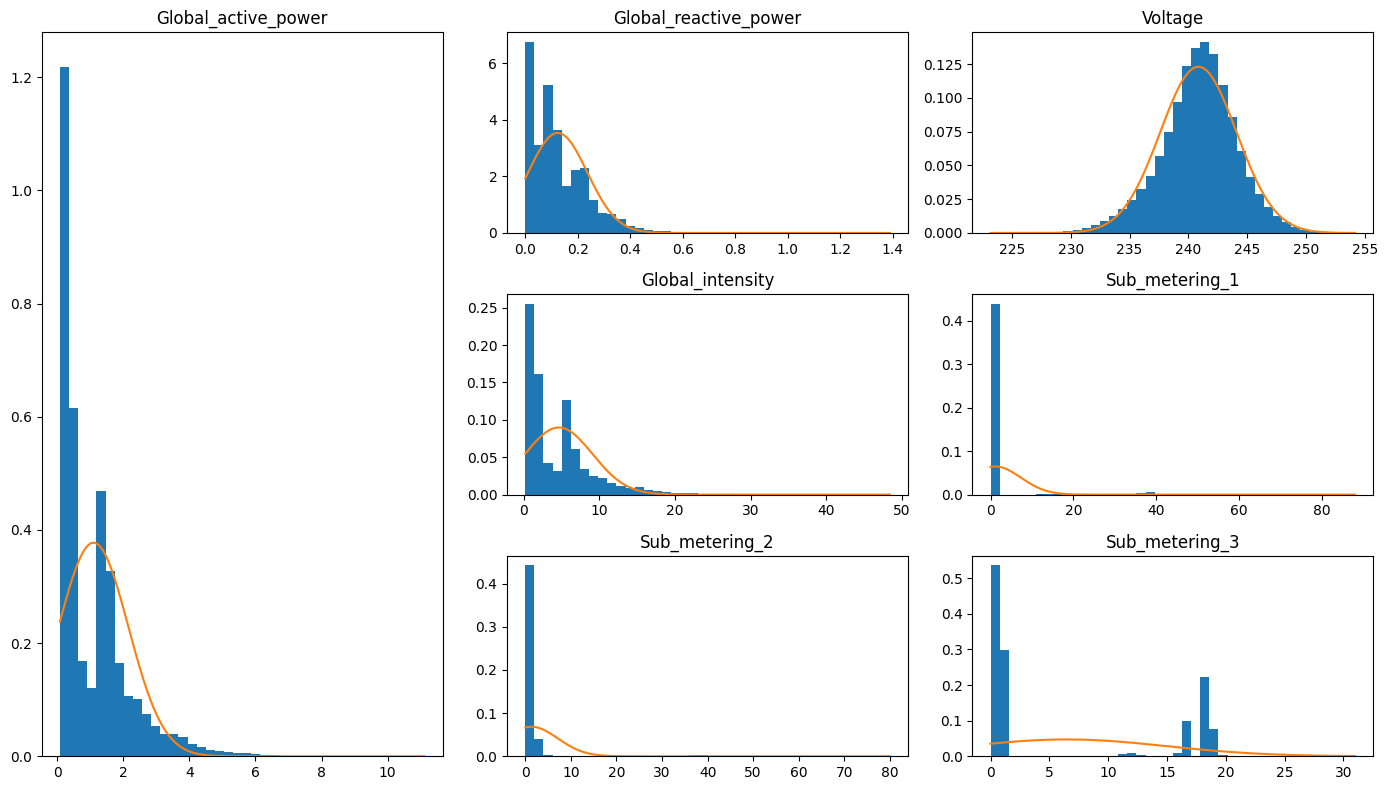

In [7]:
import tensorflow as tf
features = df.select_dtypes(include="number").columns
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(3, 3)
ax_big = fig.add_subplot(gs[:, 0])
small_positions = [
    (0, 1), (0, 2),
    (1, 1), (1, 2),
    (2, 1), (2, 2)
]

axes_small = [
    fig.add_subplot(gs[r, c]) for r, c in small_positions
]
def plot_distribution(ax, data, title):
    data = data.dropna()
    mean = data.mean()
    std = data.std()

    ax.hist(data, bins=40, density=True)
    x = np.linspace(data.min(), data.max(), 400)
    normal_curve = (
        1 / (std * np.sqrt(2 * np.pi))
    ) * np.exp(-0.5 * ((x - mean) / std) ** 2)

    ax.plot(x, normal_curve)
    ax.set_title(title)
plot_distribution(ax_big, df[features[0]], features[0])
for ax, feature in zip(axes_small, features[1:]):
    plot_distribution(ax, df[feature], feature)
plt.tight_layout()
plt.show()
